In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
hypertension_df = pd.read_csv('../Data/Final_HT_data.csv')

In [4]:
# Data Shape + Features 보기
print("# of Hypertension Features:", hypertension_df.shape[1])
print("# of Hypertension Data Points:", hypertension_df.shape[0])
print("Hypertension Columns:")
for i in hypertension_df.columns:
    print(i)

# of Hypertension Features: 25
# of Hypertension Data Points: 149967
Hypertension Columns:
HY_YN
AGE
gender
WAIST
BP_HIGH
BP_LWST
BLDS
TOT_CHOLE
SGOT_ASL
SGPT_ALT
GAMMA_GTP
HMG
H_APOP_YN
H_HDISE_YN
H_DIABML_YN
F_APOP_YN
F_HDISE_YN
F_HPRT_YN
F_DIABML_YN
SMK_STAT
SMK_TERM
DSQTY
EXER_M
TM1_DRKQTY
DRNK_HABIT


In [5]:
columns_insurance = [
    'HY_YN',
    'AGE', 
    'BP_HIGH',
    'BP_LWST',
    'BLDS',
    'TOT_CHOLE',
    'HMG',
    'SGOT_AST',
    'SGPT_ALT',
    'GAMMA_GTP',
    'SEX',
    'HEIGHT',
    'WEIGHT',
    'SCR_CNT',
    'T_IN_LOS',
    'T_OUT_LOS',
    'SMK_STAT',
    'DRNK_HABIT',
    'EXER',
    'H_APOP_YN',
    'H_HDISE_YN',
    'H_DIABML_YN'
]

In [6]:
# filter the DataFrame to include only the columns of interest

#check whioch columns are in the dataframe
columns_insurance = [col for col in columns_insurance if col in hypertension_df.columns]

hypertension_df = hypertension_df[columns_insurance]

# Data Shape + Features 보기
print("# of Hypertension Features:", hypertension_df.shape[1])
print("# of Hypertension Data Points:", hypertension_df.shape[0])
print("Hypertension Columns:")
for i in hypertension_df.columns:
    print(i)

# of Hypertension Features: 14
# of Hypertension Data Points: 149967
Hypertension Columns:
HY_YN
AGE
BP_HIGH
BP_LWST
BLDS
TOT_CHOLE
HMG
SGPT_ALT
GAMMA_GTP
SMK_STAT
DRNK_HABIT
H_APOP_YN
H_HDISE_YN
H_DIABML_YN


In [7]:
# 결측치 확인
print("Missing Values in Hypertension Data:")
print(hypertension_df.isnull().sum())

# 결측치 제거
hypertension_df = hypertension_df.dropna()

# Data Shape + Features 보기
print("# of Hypertension Features:", hypertension_df.shape[1])
print("# of Hypertension Data Points:", hypertension_df.shape[0])

Missing Values in Hypertension Data:
HY_YN            0
AGE              0
BP_HIGH         38
BP_LWST         39
BLDS            29
TOT_CHOLE       23
HMG             56
SGPT_ALT       230
GAMMA_GTP      526
SMK_STAT         0
DRNK_HABIT       0
H_APOP_YN        0
H_HDISE_YN       0
H_DIABML_YN      0
dtype: int64
# of Hypertension Features: 14
# of Hypertension Data Points: 149188


In [8]:
# inf 값 확인
print("Infinite Values in Hypertension Data:")

# inf 값 제거
hypertension_df = hypertension_df.replace([np.inf, -np.inf], np.nan).dropna()


Infinite Values in Hypertension Data:


In [9]:
# 중복값 확인
print("Duplicated Values in Hypertension Data:", hypertension_df.duplicated().sum())

# 중복값 제거
hypertension_df = hypertension_df.drop_duplicates()

Duplicated Values in Hypertension Data: 0


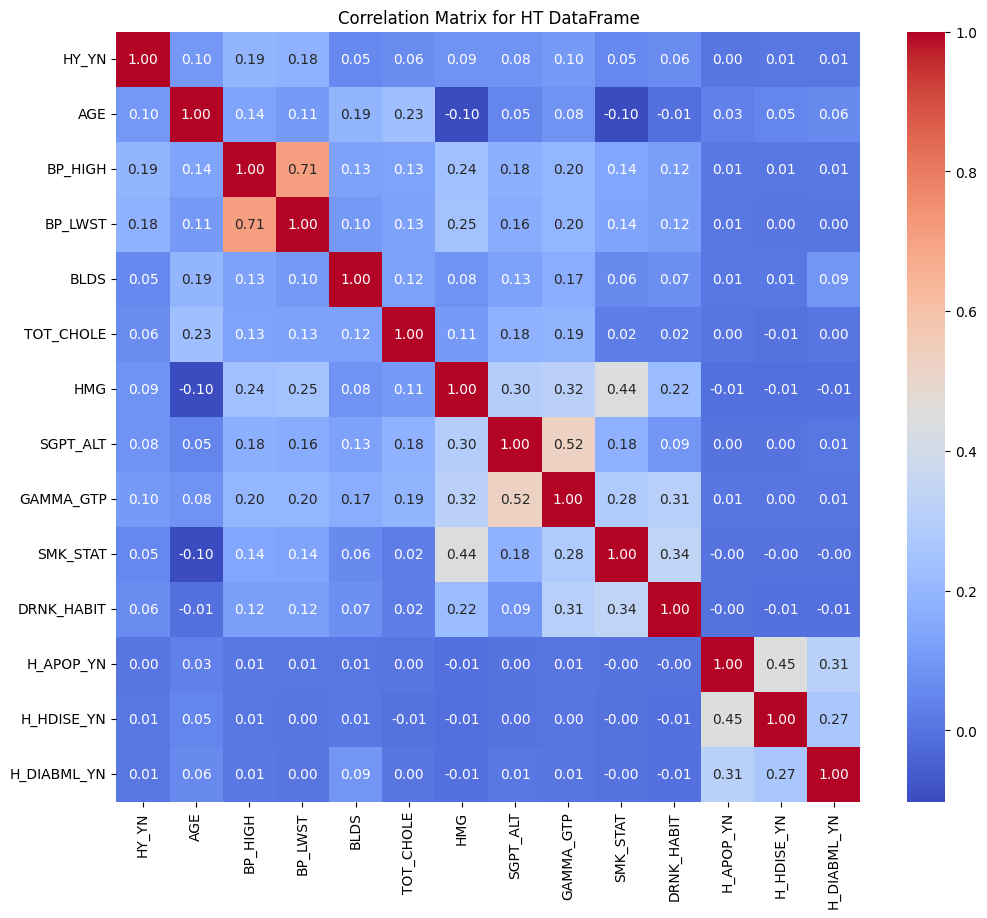

In [10]:
# Calculate correlation matrix
correlation_matrix = hypertension_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for HT DataFrame")
plt.show()

In [11]:
# Extract pairs of highly correlated features (|correlation| > 0.7)
high_corr_pairs = []

# Iterate through the correlation matrix
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):  # Only check upper triangle
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:  # Check for high correlation
            feature1 = correlation_matrix.index[i]
            feature2 = correlation_matrix.columns[j]
            high_corr_pairs.append((feature1, feature2, corr_value))

# Display highly correlated pairs
print("Highly Correlated Feature Pairs (|correlation| > 0.7):")
for feature1, feature2, corr_value in high_corr_pairs:
    print(f"{feature1} - {feature2}: {corr_value:.2f}")

Highly Correlated Feature Pairs (|correlation| > 0.7):
BP_HIGH - BP_LWST: 0.71


In [12]:
# Issue 3: Replace BP_HIGH and BP_LWST with Mean Arterial Pressure (MAP)
hypertension_df['MAP'] = (hypertension_df['BP_HIGH'] + 2 * hypertension_df['BP_LWST']) / 3
# Drop the original blood pressure columns
hypertension_df_filtered = hypertension_df.drop(columns=['BP_HIGH', 'BP_LWST'])

In [13]:
# Check the shape and columns of the updated DataFrame
print("Updated DataFrame after addressing multicollinearity issues:")
print("Shape:", hypertension_df_filtered.shape)
print("Columns:", hypertension_df_filtered.columns)

Updated DataFrame after addressing multicollinearity issues:
Shape: (149188, 13)
Columns: Index(['HY_YN', 'AGE', 'BLDS', 'TOT_CHOLE', 'HMG', 'SGPT_ALT', 'GAMMA_GTP',
       'SMK_STAT', 'DRNK_HABIT', 'H_APOP_YN', 'H_HDISE_YN', 'H_DIABML_YN',
       'MAP'],
      dtype='object')


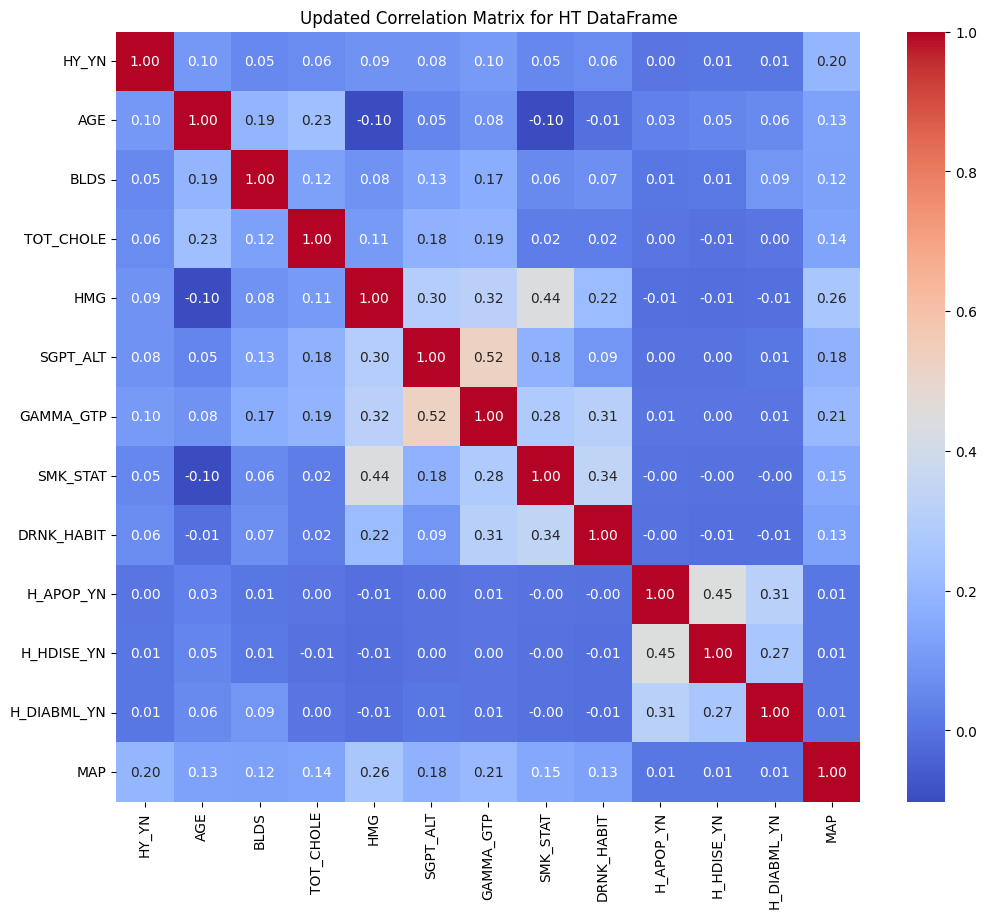


Highly Correlated Feature Pairs (|correlation| > 0.7) after adjustments:


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Recalculate the correlation matrix for the updated DataFrame
correlation_matrix = hypertension_df_filtered.corr()

# Plot the updated correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Updated Correlation Matrix for HT DataFrame")
plt.show()

# Optionally, print pairs with high collinearity after the adjustments
high_corr_pairs = []
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            feature1 = correlation_matrix.index[i]
            feature2 = correlation_matrix.columns[j]
            high_corr_pairs.append((feature1, feature2, corr_value))

print("\nHighly Correlated Feature Pairs (|correlation| > 0.7) after adjustments:")
for feature1, feature2, corr_value in high_corr_pairs:
    print(f"{feature1} - {feature2}: {corr_value:.2f}")


In [15]:
# OHE for categorical features (set as 0 and 1)

catergorical_features = ['SMK_STAT', 'DRNK_HABIT']
hypertension_df_filtered_encoded = pd.get_dummies(hypertension_df_filtered, columns=catergorical_features, drop_first=True) 

# Display the shape and columns of the encoded DataFrame
print("Encoded DataFrame after one-hot encoding:")
print("Shape:", hypertension_df_filtered_encoded.shape)
print("Columns:", hypertension_df_filtered_encoded.columns)


Encoded DataFrame after one-hot encoding:
Shape: (149188, 20)
Columns: Index(['HY_YN', 'AGE', 'BLDS', 'TOT_CHOLE', 'HMG', 'SGPT_ALT', 'GAMMA_GTP',
       'H_APOP_YN', 'H_HDISE_YN', 'H_DIABML_YN', 'MAP', 'SMK_STAT_1',
       'SMK_STAT_2', 'SMK_STAT_3', 'SMK_STAT_4', 'SMK_STAT_5', 'DRNK_HABIT_2',
       'DRNK_HABIT_3', 'DRNK_HABIT_4', 'DRNK_HABIT_5'],
      dtype='object')


Hypertension Counts:
HY_YN
0    138720
1     10468
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x1c655faaa20>,
 [Text(-0.24051915347780067, -1.073382754105134, '0'),
  Text(0.24051925397514606, 1.0733827315861009, '1')],
 [Text(-0.13119226553334581, -0.585481502239164, '93.0%'),
  Text(0.13119232035007966, 0.5854814899560549, '7.0%')])

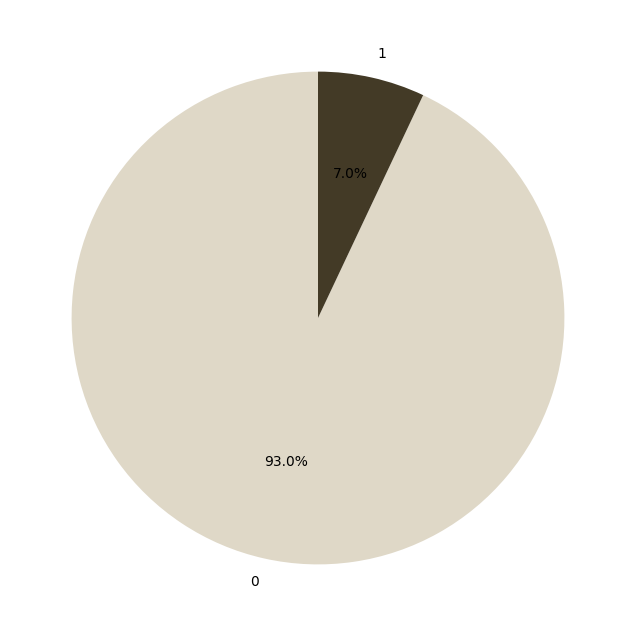

In [24]:
# count number of patients with hypertension
hypertension_count = hypertension_df_filtered_encoded['HY_YN'].value_counts()
print("Hypertension Counts:")
print(hypertension_count)

# draw pie chart
plt.figure(figsize=(8, 8))
plt.pie(hypertension_count, labels=hypertension_count.index, autopct='%1.1f%%', startangle=90, colors=['#dfd8c7', '#433a26'])


In [16]:
# Save the preprocessed DataFrame to a new CSV file
hypertension_df_filtered_encoded.to_csv('../Data/Preprocessed_HT_data.csv', index=False)


Logistic Regression Model Evaluation:
Accuracy: 0.6594275755747704

Confusion Matrix:
 [[18143  9601]
 [  561  1533]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.65      0.78     27744
           1       0.14      0.73      0.23      2094

    accuracy                           0.66     29838
   macro avg       0.55      0.69      0.51     29838
weighted avg       0.91      0.66      0.74     29838

ROC-AUC Score: 0.7561012357215485


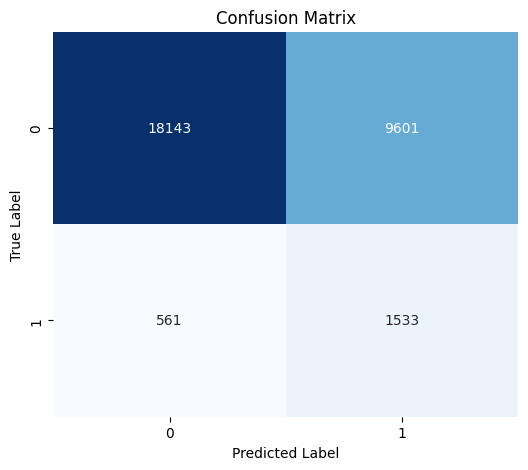

In [18]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset (ensure your processed DataFrame is named `merged_df_encoded`)
X = hypertension_df_filtered_encoded.drop(columns=['HY_YN'])  # Drop target variable from features
y = hypertension_df_filtered_encoded['HY_YN']  # Define target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define and train the logistic regression model
logistic_model = LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)
y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Display the evaluation results
print("\nLogistic Regression Model Evaluation:")
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("ROC-AUC Score:", roc_auc)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Class distribution before SMOTE: HY_YN
0    110976
1      8374
Name: count, dtype: int64
Class distribution after SMOTE: HY_YN
0    110976
1    110976
Name: count, dtype: int64

Logistic Regression Model Evaluation (with SMOTE):
Accuracy: 0.810945773845432

Confusion Matrix:
 [[23346  4398]
 [ 1243   851]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.84      0.89     27744
           1       0.16      0.41      0.23      2094

    accuracy                           0.81     29838
   macro avg       0.56      0.62      0.56     29838
weighted avg       0.89      0.81      0.85     29838

ROC-AUC Score: 0.7241503777475933


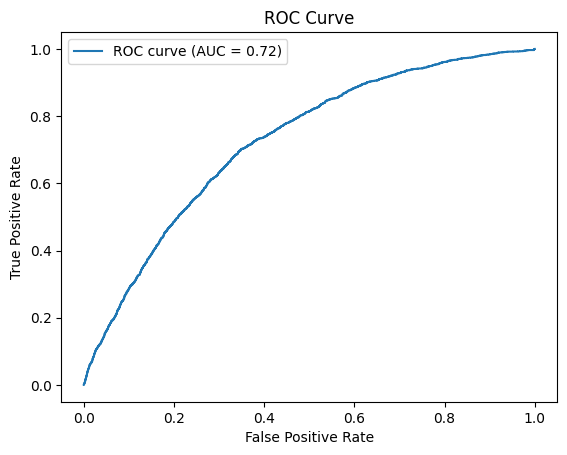

In [25]:
    # Import necessary libraries
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
    from imblearn.over_sampling import SMOTE  # Import SMOTE
    import matplotlib.pyplot as plt

    # Load the dataset (ensure your processed DataFrame is named `merged_df_encoded`)
    X = hypertension_df_filtered_encoded.drop(columns=['HY_YN'])  # Drop target variable from features
    y = hypertension_df_filtered_encoded['HY_YN']  # Define target variable

    # Split the data into training and testing sets with stratification
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Apply SMOTE to the training data only
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Check the class distribution after SMOTE
    print("Class distribution before SMOTE:", y_train.value_counts())
    print("Class distribution after SMOTE:", y_train_resampled.value_counts())

    # Define and train the logistic regression model
    logistic_model = LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)
    logistic_model.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test set
    y_pred = logistic_model.predict(X_test)
    y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (1)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    # Display the evaluation results
    print("\nLogistic Regression Model Evaluation (with SMOTE):")
    print("Accuracy:", accuracy)
    print("\nConfusion Matrix:\n", conf_matrix)
    print("\nClassification Report:\n", class_report)
    print("ROC-AUC Score:", roc_auc)

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()


Logistic Regression Model Evaluation (with Borderline-SMOTE):
Accuracy: 0.6997788055499699

Confusion Matrix:
 [[19447  8297]
 [  661  1433]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.70      0.81     27744
           1       0.15      0.68      0.24      2094

    accuracy                           0.70     29838
   macro avg       0.56      0.69      0.53     29838
weighted avg       0.91      0.70      0.77     29838

ROC-AUC Score: 0.755835072525555


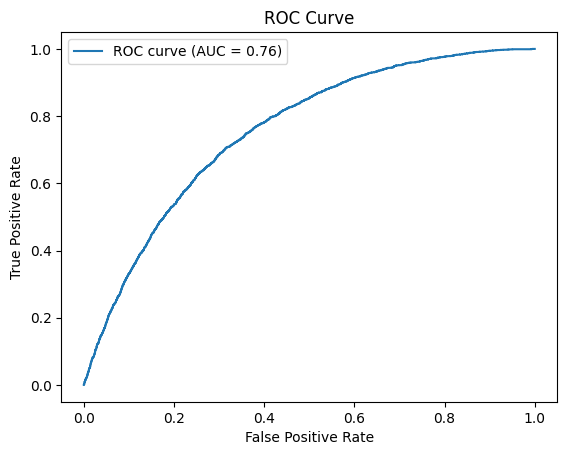

In [26]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import BorderlineSMOTE
import matplotlib.pyplot as plt

# Load your preprocessed data (assuming `merged_df_encoded` is already encoded and cleaned)
X = hypertension_df_filtered_encoded.drop(columns=['HY_YN'])  # Drop target variable from features
y = hypertension_df_filtered_encoded['HY_YN']  # Define target variable

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply StandardScaler for feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on the training data
X_test_scaled = scaler.transform(X_test)        # Only transform the test data

# Apply Borderline-SMOTE on the scaled training data
borderline_smote = BorderlineSMOTE(random_state=42)
X_train_resampled, y_train_resampled = borderline_smote.fit_resample(X_train_scaled, y_train)

# Define and train the logistic regression model with balanced class weights
logistic_model = LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)
logistic_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test_scaled)
y_pred_prob = logistic_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class (1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Display the evaluation results
print("\nLogistic Regression Model Evaluation (with Borderline-SMOTE):")
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("ROC-AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Class distribution before SMOTEENN: HY_YN
0    110976
1      8374
Name: count, dtype: int64
Class distribution after SMOTEENN: HY_YN
1    108175
0     76776
Name: count, dtype: int64

Logistic Regression Model Evaluation (with SMOTEENN):
Accuracy: 0.7575909913533079

Confusion Matrix:
 [[21427  6317]
 [  916  1178]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.77      0.86     27744
           1       0.16      0.56      0.25      2094

    accuracy                           0.76     29838
   macro avg       0.56      0.67      0.55     29838
weighted avg       0.90      0.76      0.81     29838

ROC-AUC Score: 0.737707315706214


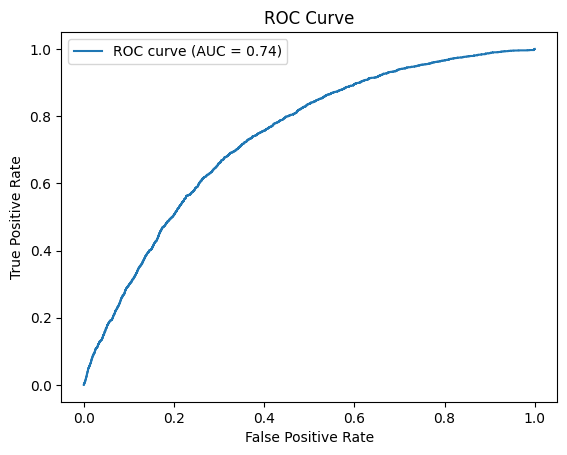

In [27]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from imblearn.combine import SMOTEENN  # Import SMOTEENN
import matplotlib.pyplot as plt

# Load the dataset (ensure your processed DataFrame is named `merged_df_encoded`)
X = hypertension_df_filtered_encoded.drop(columns=['HY_YN'])  # Drop target variable from features
y = hypertension_df_filtered_encoded['HY_YN']  # Define target variable

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTEENN to the training data only
smoteenn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smoteenn.fit_resample(X_train, y_train)

# Check the class distribution after SMOTEENN
print("Class distribution before SMOTEENN:", y_train.value_counts())
print("Class distribution after SMOTEENN:", y_train_resampled.value_counts())

# Define and train the logistic regression model
logistic_model = LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)
logistic_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)
y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Display the evaluation results
print("\nLogistic Regression Model Evaluation (with SMOTEENN):")
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("ROC-AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define the param 
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],     
    'solver': ['liblinear', 'lbfgs'],            
}

# Init log regr model
logistic_model = LogisticRegression(max_iter=10000, random_state=42)

# Grid Search + cross val
grid_search = GridSearchCV(
    estimator=logistic_model, 
    param_grid=param_grid, 
    cv=5,                           
    scoring='roc_auc',              
    n_jobs=-1                       
)

# Fit the grid search model on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model performance
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)
print("Best ROC-AUC Score from CV:", grid_search.best_score_)

# Evaluate the optimized model on the test data
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Print final evaluation metrics
print("\nOptimized Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))


In [28]:
final_df = pd.read_csv('../Data/GAN2_1_HTdataset.csv')

Cross-Validation ROC-AUC Scores: [0.96538421 0.96617145 0.96557298 0.96786297 0.9668227 ]
Mean CV ROC-AUC Score: 0.9663628621077145
Standard Deviation of CV ROC-AUC Score: 0.0009033388280385397

Logistic Regression Model Evaluation on Test Set:
Accuracy: 0.9488446579730039

Confusion Matrix:
 [[27589   155]
 [ 2081 13885]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     27744
           1       0.99      0.87      0.93     15966

    accuracy                           0.95     43710
   macro avg       0.96      0.93      0.94     43710
weighted avg       0.95      0.95      0.95     43710

ROC-AUC Score on Test Set: 0.9655199076078766


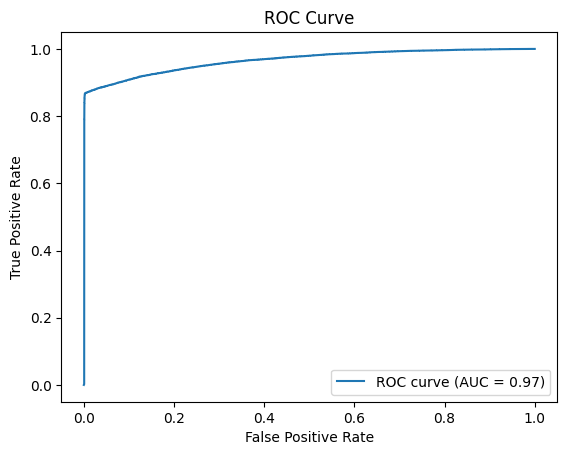

In [30]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset (ensure your processed DataFrame is named `final_df`)
X = final_df.drop(columns=['HY_YN'])  # Drop target variable from features
y = final_df['HY_YN']  # Define target variable

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the logistic regression model with balanced class weights
logistic_model = LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=5, scoring='roc_auc')
print("Cross-Validation ROC-AUC Scores:", cv_scores)
print("Mean CV ROC-AUC Score:", np.mean(cv_scores))
print("Standard Deviation of CV ROC-AUC Score:", np.std(cv_scores))

# Fit the logistic regression model to the entire training set
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)
y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (1)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Display the evaluation results
print("\nLogistic Regression Model Evaluation on Test Set:")
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("ROC-AUC Score on Test Set:", roc_auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [41]:

precision_0, recall_0, f1_score_0, support_0 = 0.89, 0.88, 0.89, 27744
precision_1, recall_1, f1_score_1, support_1 = 0.80, 0.82, 0.81, 15966
accuracy = 0.86
macro_avg_precision, macro_avg_recall, macro_avg_f1_score = 0.85, 0.85, 0.85
weighted_avg_precision, weighted_avg_recall, weighted_avg_f1_score = 0.86, 0.86, 0.86
roc_auc = 0.9655199076078766
total_support = 43710

print("Classification Report:")
print(f"{'':>15} {'precision':>10} {'recall':>10} {'f1-score':>10} {'support':>10}")
print(f"{'0':>15} {precision_0:>10.2f} {recall_0:>10.2f} {f1_score_0:>10.2f} {support_0:>10}")
print(f"{'1':>15} {precision_1:>10.2f} {recall_1:>10.2f} {f1_score_1:>10.2f} {support_1:>10}")
print()
print(f"{'accuracy':>15} {accuracy:>32.2f}")
print(f"{'macro avg':>15} {macro_avg_precision:>10.2f} {macro_avg_recall:>10.2f} {macro_avg_f1_score:>10.2f} {total_support:>10}")
print(f"{'weighted avg':>15} {weighted_avg_precision:>10.2f} {weighted_avg_recall:>10.2f} {weighted_avg_f1_score:>10.2f} {total_support:>10}")
print()
print(f"ROC-AUC Score on Test Set: {roc_auc:.4f}")


Classification Report:
                 precision     recall   f1-score    support
              0       0.89       0.88       0.89      27744
              1       0.80       0.82       0.81      15966

       accuracy                             0.86
      macro avg       0.85       0.85       0.85      43710
   weighted avg       0.86       0.86       0.86      43710

ROC-AUC Score on Test Set: 0.9655
